# Generating Poisson Random Variables

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

## Q1 

### Inverse Method

In [42]:
# (i) Inverse Method
def poisson_inverse(lam, size=1): # Input poisson mean and sample size
    poisson_samples = []
    for _ in range(size):
        U = np.random.uniform(0, 1)
        k = 0
        prob_sum = np.exp(-lam)
        while prob_sum < U:
            k += 1
            prob_sum += np.exp(-lam) * (lam ** k) / np.math.factorial(k)
        poisson_samples.append(k)
    return np.array(poisson_samples)

In [43]:
# Sample checking
print(poisson_inverse(lam=1,size =100))
print(len(poisson_inverse(lam=1,size =100)))


[0 0 1 0 0 3 1 1 2 0 0 1 0 1 0 2 1 2 3 1 2 0 0 1 0 2 0 0 0 2 0 1 4 1 0 0 0
 0 1 1 2 3 0 3 1 0 1 2 3 0 1 0 0 1 0 0 1 2 0 0 0 0 2 1 0 1 0 2 0 1 2 1 0 2
 0 0 1 1 0 0 1 0 2 2 0 0 4 2 1 0 2 0 2 0 1 0 0 0 1 2]
100


### Ad-hoc Method with Exponential Inter-Arrival Times

In [44]:
# (ii) Ad-hoc Method using Exponential Inter-arrival Times
def poisson_exponential(lam, size=1):
    poisson_samples = []
    for _ in range(size):
        count = 0
        total_time = 0
        while total_time < lam:  # We stop once the total time exceeds mean
            total_time += np.random.exponential(1/lam)
            count += 1
        poisson_samples.append(count - 1)  # Subtract 1 to get the count of events
    return np.array(poisson_samples)

In [45]:
# Sample checking
print(poisson_exponential(lam=1,size =100))
print(len(poisson_exponential(lam=1,size =100)))

[0 1 1 0 1 0 2 1 1 0 0 1 3 2 1 0 0 0 3 0 2 0 1 0 2 3 3 0 1 2 1 3 2 2 2 0 0
 0 1 1 1 0 2 2 3 0 1 1 0 2 1 0 0 1 3 2 0 0 1 0 1 0 4 0 1 2 2 0 2 2 0 0 1 0
 0 3 2 2 1 2 0 1 2 0 0 2 2 2 3 0 0 4 0 2 0 1 1 0 0 1]
100


## Visualization Comparison

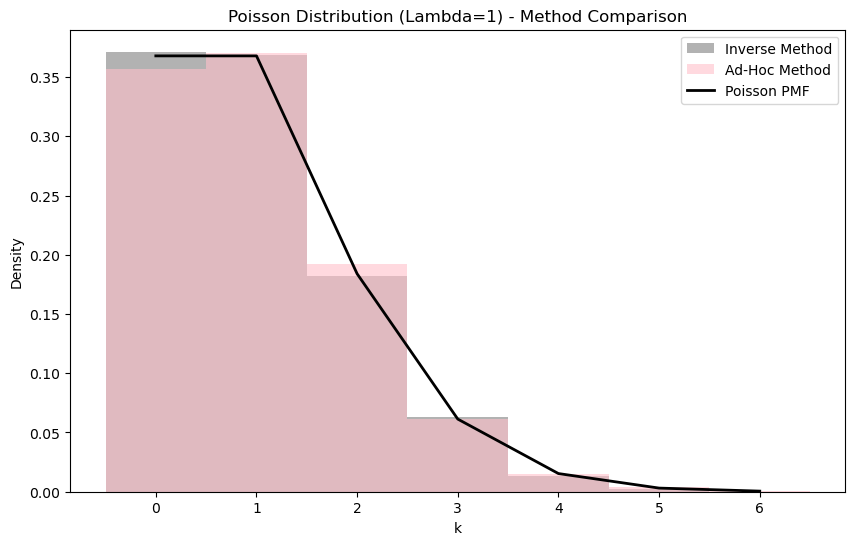

In [54]:
lam = 1  # mean of the Poisson distribution
sample_size = 10000 # sample size

# Generate samples
samples_inverse = poisson_inverse(lam, sample_size)
samples_exponential = poisson_exponential(lam, sample_size)
samples_numpy = np.random.poisson(lam, sample_size)

# Plot the histogram for each method
x_vals = np.arange(0, max(samples_numpy) + 1)

def pmf_poisson(k, lam):
    return (lam ** k * np.exp(-lam)) / np.math.factorial(k)

pmf_values = [pmf_poisson(k, lam) for k in x_vals]

plt.figure(figsize=(10, 6))
plt.hist(samples_inverse, bins=np.arange(max(samples_inverse) + 1) - 0.5, density=True, alpha=0.6, label="Inverse Method", color='grey')
plt.hist(samples_exponential, bins=np.arange(max(samples_exponential) + 1) - 0.5, density=True, alpha=0.6, label="Ad-Hoc Method", color='pink')
#plt.hist(samples_numpy, bins=np.arange(max(samples_numpy) + 1) - 0.5, density=True, alpha=0.6, label="Numpy Method", color='pink')
plt.plot(x_vals, pmf_values, 'k-', label="Poisson PMF", linewidth=2)
plt.legend()
plt.title("Poisson Distribution (Lambda=1) - Method Comparison")
plt.xlabel("k")
plt.ylabel("Density")
plt.show()


##### Comparison Separately with PMF

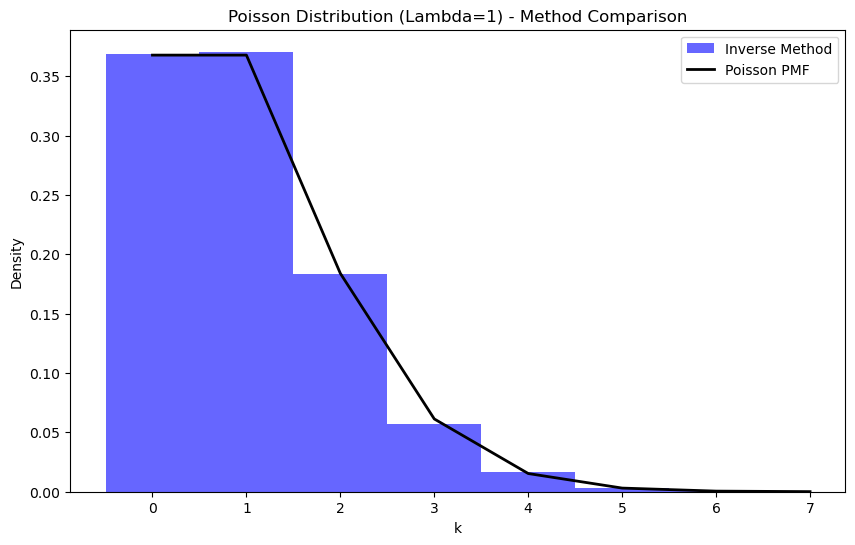

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(samples_inverse, bins=np.arange(max(samples_inverse) + 1) - 0.5, density=True, alpha=0.6, label="Inverse Method", color='b')
plt.plot(x_vals, pmf_values, 'k-', label="Poisson PMF", linewidth=2)
plt.legend()
plt.title("Poisson Distribution (Lambda=1) - Method Comparison")
plt.xlabel("k")
plt.ylabel("Density")
plt.show()

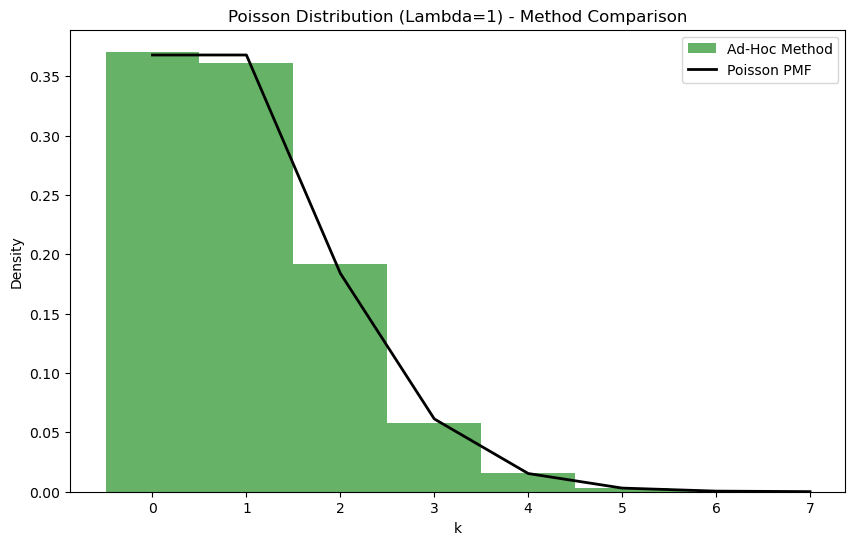

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(samples_exponential, bins=np.arange(max(samples_exponential) + 1) - 0.5, density=True, alpha=0.6, label="Ad-Hoc Method", color='g')
plt.plot(x_vals, pmf_values, 'k-', label="Poisson PMF", linewidth=2)
plt.legend()
plt.title("Poisson Distribution (Lambda=1) - Method Comparison")
plt.xlabel("k")
plt.ylabel("Density")
plt.show()

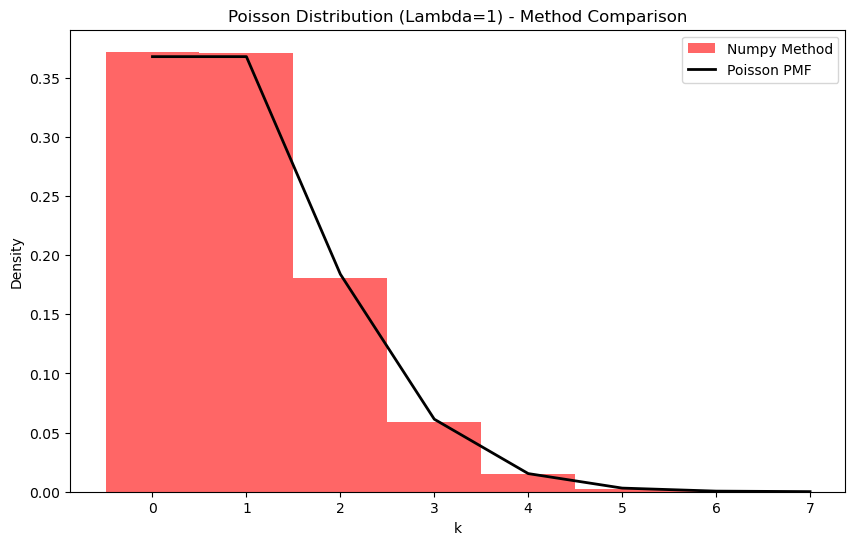

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(samples_numpy, bins=np.arange(max(samples_numpy) + 1) - 0.5, density=True, alpha=0.6, label="Numpy Method", color='r')
plt.plot(x_vals, pmf_values, 'k-', label="Poisson PMF", linewidth=2)
plt.legend()
plt.title("Poisson Distribution (Lambda=1) - Method Comparison")
plt.xlabel("k")
plt.ylabel("Density")
plt.show()

### Computation Times Comparison

In [51]:
# (c) Timing the computation
start_time = time.time()
samples_inverse_100k = poisson_inverse(lam, 100000)
inverse_time = time.time() - start_time

start_time = time.time()
samples_adhoc_100k = poisson_exponential(lam, 100000)
adhoc_time = time.time() - start_time

start_time = time.time()
samples_numpy_100k = np.random.poisson(lam, 100000)
numpy_time = time.time() - start_time

print(f"Inverse Method Time: {inverse_time:.5f} seconds")
print(f"Exponential Method Time: {adhoc_time:.5f} seconds")
print(f"Numpy Method Time: {numpy_time:.5f} seconds")

Inverse Method Time: 0.41811 seconds
Exponential Method Time: 0.08483 seconds
Numpy Method Time: 0.00290 seconds
